# Ejercicios del tema de Máquinas de Vectores de Soporte

*Hugo Díaz Díaz* (*hdiazd00@estudiantes.unileon.es*)

*Correo profesional: hugo.didi.contacto@gmail.com*

---

## Parte teórica (opcional):

### 1. ¿Cuál es la idea fundamental de las máquinas de vectores soporte?

La idea clave es encontrar un límite de decisión que no solo separe las clases, sino que lo haga dejando la “calle” o margen lo más ancho posible entre ellas. Al maximizar ese margen, el modelo suele generalizar mejor. En esencia, una SVM busca el hiperplano que esté lo más alejado posible de las muestras críticas de cada clase (las que apoyan ese margen).

### 2. ¿Qué es un vector de soporte?

Son las muestras que quedan en el borde del margen. Son las que “soportan” la calle y determinan completamente el límite de decisión. Si modificases otras muestras que están lejos del margen, la frontera no cambiaría, pero si mueves un vector de soporte sí lo hace.

### 3. ¿Por qué es importante escalar las entradas cuando se utilizan SVM?

Las SVM son sensibles a la escala porque la posición del margen depende directamente de la geometría del espacio de características. Si una característica tiene valores mucho mayores que otra, domina la definición del margen, inclinando la frontera. Al escalar, se equilibran las dimensiones y el modelo encuentra un margen coherente.

### 4. ¿Puede un clasificador SVM dar una puntuación de confianza cuando clasifica una muestra? ¿Y una probabilidad?

Sí puede dar una puntuación, que es el valor de la decision function: básicamente la distancia con signo al límite. No es una probabilidad, aunque se puede interpretar como nivel de confianza. 

### 5. ¿Cómo elegir entre `LinearSVC`, `SVC` y `SGDClassifier`?

Lo más eficiente para datos lineales y grandes es `LinearSVC`, que es mucho más rápido que `SVC(kernel="linear")`. Si el dataset no es enorme, también se puede probar SVC con kernels (por ejemplo, RBF). `SGDClassifier` sería otra opción lineal basada en descenso de gradiente estocástico, útil cuando el dataset es muy grande o se requiere entrenamiento online.

### 6. Supongamos que ha entrenado un clasificador SVM con un kernel RBF. Parece que no se ajusta al conjunto de entrenamiento: ¿debería aumentar o disminuir γ? ¿Qué pasa con `C`?

Si el modelo no se ajusta, es decir, está infraajustando, deberías aumentar γ, porque hace que la influencia de cada punto sea más localizada, y el límite se vuelva más flexible. También podría ayudar **aumentar C**, que penaliza más las violaciones del margen y permite un ajuste más estricto. Si fuese sobreajuste, sería al revés.

### 7. ¿Qué significa para un modelo ser $\epsilon$-insensitive?

Significa que, en regresión SVM, las predicciones no se ven afectadas por puntos que están dentro de la “calle” definida por ε. Si una muestra cae dentro de esa franja, no genera penalización. Por eso se dice que el modelo es insensible a pequeños errores mientras estén dentro del margen.

### 8. ¿Para qué sirve utilizar el *kernel trick*?

Sirve para manejar relaciones no lineales sin tener que añadir explícitamente muchas características nuevas. Matemáticamente permite calcular productos en un espacio de mayor dimensión sin construir ese espacio, evitando la explosión combinatoria y manteniendo el coste computacional razonable.

## Parte práctica (obligatoria):

### 9. Entrene un `LinearSVC` en un conjunto de datos linealmente separables. A continuación, entrene un `SVC` y un `SGDClassifier` en el mismo conjunto de datos. Vea si puede conseguir que produzcan aproximadamente el mismo modelo.

#### Inicialización. Cargar librerías y generar datos

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

Ahora se va a crear un conjunto de datos linealmente separables. Se van a generar dos nuebes de puntos bien separados con Numpy.

In [2]:
# Semilla para reproducibilidad
np.random.seed(42)

# Número de muestras por clase
n_samples_per_class = 100

# Clase 0: alrededor de (0, 0)
X0 = np.random.randn(n_samples_per_class, 2) * 0.5 + np.array([0, 0])
y0 = np.zeros(n_samples_per_class, dtype=int)

# Clase 1: alrededor de (2, 2)
X1 = np.random.randn(n_samples_per_class, 2) * 0.5 + np.array([2, 2])
y1 = np.ones(n_samples_per_class, dtype=int)

# Unimos las dos clases
X = np.vstack([X0, X1])
y = np.concatenate([y0, y1])

# División train/test para comprobar que generaliza
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Representar los datos generados para comprobar que son linealmente separables.

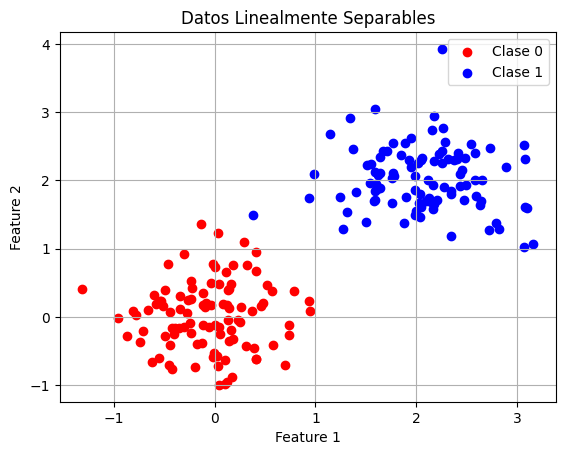

In [3]:
# Representar los datos generados para comprobar que son linealmente separables.
plt.scatter(X0[:, 0], X0[:, 1], color='red', label='Clase 0')
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Clase 1')
plt.title('Datos Linealmente Separables')   
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

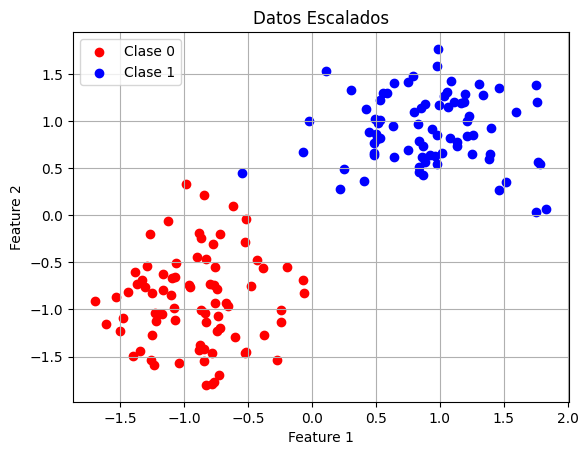

In [4]:
# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Representar los datos escalados
plt.scatter(X_train_scaled[y_train == 0][:, 0], X_train_scaled[y_train == 0][:, 1], color='red', label='Clase 0')
plt.scatter(X_train_scaled[y_train == 1][:, 0], X_train_scaled[y_train == 1][:, 1], color='blue', label='Clase 1')
plt.title('Datos Escalados')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

##### Entrenamiento del LinearSVC

Usando un C relativamente alto para que el modelo se ajuste bien a los datos.

In [5]:
linear_svc = LinearSVC(
    C=100.0, # margen más estricto
    loss='hinge', 
    random_state=42
    )
linear_svc.fit(X_train_scaled, y_train)

# Evaluar el modelo
train_accuracy = linear_svc.score(X_train_scaled, y_train)
test_accuracy = linear_svc.score(X_test_scaled, y_test)

# Coeficiente y sesgo
w = linear_svc.coef_[0]
b = linear_svc.intercept_[0]

print("LinearSVC \n-----------------")
print(f"Precisión en entrenamiento: {train_accuracy:.2f}")
print(f"Precisión en test: {test_accuracy:.2f}")
print(f"Coeficiente (w): {w}")
print(f"Sesgo (b): {b}")

LinearSVC 
-----------------
Precisión en entrenamiento: 1.00
Precisión en test: 1.00
Coeficiente (w): [3.25507327 4.94448124]
Sesgo (b): 0.5569938791634534


Ecuación del hiperplano (2D):

$$
w_1x + w_2y + b = 0
$$

$$
w_2y = -w_1x - b
$$

$$
y = -\frac{w_1}{w_2}x - \frac{b}{w_2} = -\frac{w_1x + b}{w_2}
$$



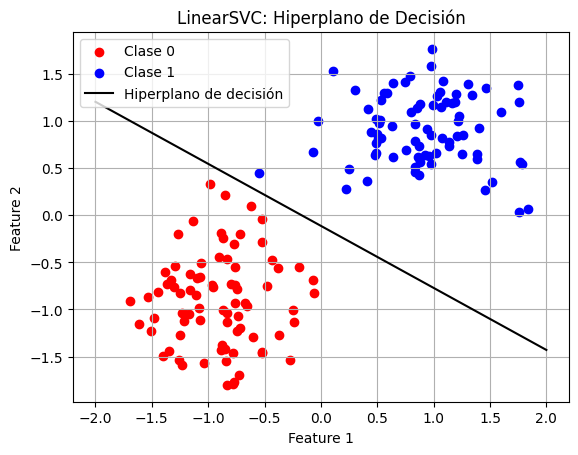

In [6]:
# Representar el hiperplano de decisión
xx = np.linspace(-2, 2, 100)
yy = - (w[0] * xx + b) / w[1]  
plt.scatter(X_train_scaled[y_train == 0][:, 0], X_train_scaled[y_train == 0][:, 1], color='red', label='Clase 0')
plt.scatter(X_train_scaled[y_train == 1][:, 0], X_train_scaled[y_train == 1][:, 1], color='blue', label='Clase 1')
plt.plot(xx, yy, 'k-', label='Hiperplano de decisión')
plt.title('LinearSVC: Hiperplano de Decisión')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

#### Entrenamiento del SVC(kernel="linear")

Esta vez se usa SVC con kernel lineal, lo que debería producir un modelo similar al anterior pero usando un algoritmo diferente.

In [7]:
svc_linear = SVC(
    kernel="linear",
    C=100.0,
    random_state=42
)
svc_linear.fit(X_train_scaled, y_train)

# Evaluar el modelo
train_accuracy_2 = svc_linear.score(X_train_scaled, y_train)
test_accuracy_2 = svc_linear.score(X_test_scaled, y_test)

# Coeficiente y sesgo
w_2 = svc_linear.coef_[0]
b_2 = svc_linear.intercept_[0]

print("SVC(linear) \n-----------------")
print(f"Precisión en entrenamiento: {train_accuracy_2:.2f}")
print(f"Precisión en test: {test_accuracy_2:.2f}")
print(f"Coeficiente (w): {w_2}")
print(f"Sesgo (b): {b_2}")

SVC(linear) 
-----------------
Precisión en entrenamiento: 1.00
Precisión en test: 1.00
Coeficiente (w): [3.25654741 4.94706801]
Sesgo (b): 0.5573507907505179


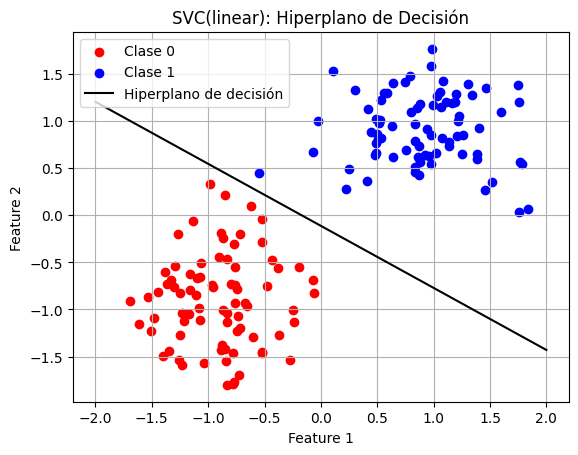

In [8]:
# Representar hiperplano de decisión
xx = np.linspace(-2, 2, 100)
yy = -(w_2[0] * xx + b_2) / w_2[1]

plt.scatter(X_train_scaled[y_train == 0][:, 0], X_train_scaled[y_train == 0][:, 1], color='red', label='Clase 0')
plt.scatter(X_train_scaled[y_train == 1][:, 0], X_train_scaled[y_train == 1][:, 1], color='blue', label='Clase 1')
plt.plot(xx, yy, 'k-', label='Hiperplano de decisión')  
plt.title('SVC(linear): Hiperplano de Decisión')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

#### Entrenamiento del SGDClassifier

Aquí se imita un SVM lineal usando descenso de gradiente estocástico.
Se baja alpha (regularización) para que sea más suave y se dan bastantes iteraciones para que converja bien.

In [9]:
sgd_clf = SGDClassifier(
    loss="hinge",     # pérdida tipo SVM
    alpha=1e-4,       # regularización moderada
    max_iter=1000,
    tol=1e-3, 
    random_state=42
)
sgd_clf.fit(X_train_scaled, y_train)

# Evaluar el modelo
train_accuracy_3 = sgd_clf.score(X_train_scaled, y_train)
test_accuracy_3 = sgd_clf.score(X_test_scaled, y_test)    

# Coeficiente y sesgo
w_3 = sgd_clf.coef_[0]
b_3 = sgd_clf.intercept_[0]

print("SGDClassifier \n-----------------")
print(f"Precisión en entrenamiento: {train_accuracy_3:.2f}")
print(f"Precisión en test: {test_accuracy_3:.2f}")
print(f"Coeficiente (w): {w_3}")
print(f"Sesgo (b): {b_3}")

SGDClassifier 
-----------------
Precisión en entrenamiento: 1.00
Precisión en test: 1.00
Coeficiente (w): [10.8512853  12.38296571]
Sesgo (b): 1.3159822032761292


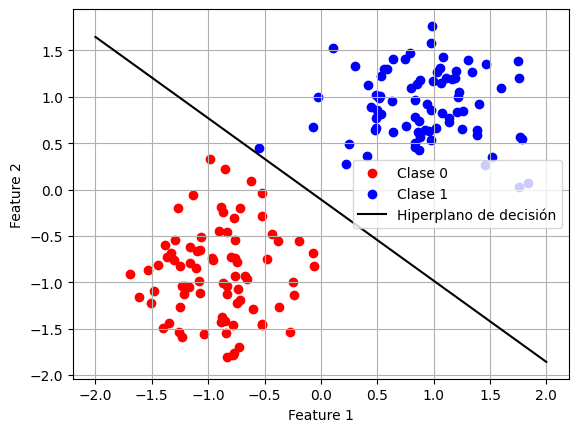

In [10]:
# Representar hiperplano de decisión
xx = np.linspace(-2, 2, 100)
yy = -(w_3[0] * xx + b_3) / w_3[1]
plt.scatter(X_train_scaled[y_train == 0][:, 0], X_train_scaled[y_train == 0][:, 1], color='red', label='Clase 0')
plt.scatter(X_train_scaled[y_train == 1][:, 0], X_train_scaled[y_train == 1][:, 1], color='blue', label='Clase 1')
plt.plot(xx, yy, 'k-', label='Hiperplano de decisión')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

#### Comparativa de los modelos obtenidos y conclusiones

In [11]:
# Diccionario resumen de resultados
results = {
    "LinearSVC": {
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy,
        "w": w,
        "b": b
    },
    "SVC(linear)": {
        "train_accuracy": train_accuracy_2,
        "test_accuracy": test_accuracy_2,
        "w": w_2,
        "b": b_2
    },
    "SGDClassifier": {
        "train_accuracy": train_accuracy_3,
        "test_accuracy": test_accuracy_3,
        "w": w_3,
        "b": b_3
    }
}

for model_name, metrics in results.items():
    print(f"{model_name} \n-----------------")
    print(f"Precisión en entrenamiento: {metrics['train_accuracy']:.2f}")
    print(f"Precisión en test: {metrics['test_accuracy']:.2f}")
    print(f"Coeficiente (w): {metrics['w']}")
    print(f"Sesgo (b): {metrics['b']}\n")

LinearSVC 
-----------------
Precisión en entrenamiento: 1.00
Precisión en test: 1.00
Coeficiente (w): [3.25507327 4.94448124]
Sesgo (b): 0.5569938791634534

SVC(linear) 
-----------------
Precisión en entrenamiento: 1.00
Precisión en test: 1.00
Coeficiente (w): [3.25654741 4.94706801]
Sesgo (b): 0.5573507907505179

SGDClassifier 
-----------------
Precisión en entrenamiento: 1.00
Precisión en test: 1.00
Coeficiente (w): [10.8512853  12.38296571]
Sesgo (b): 1.3159822032761292



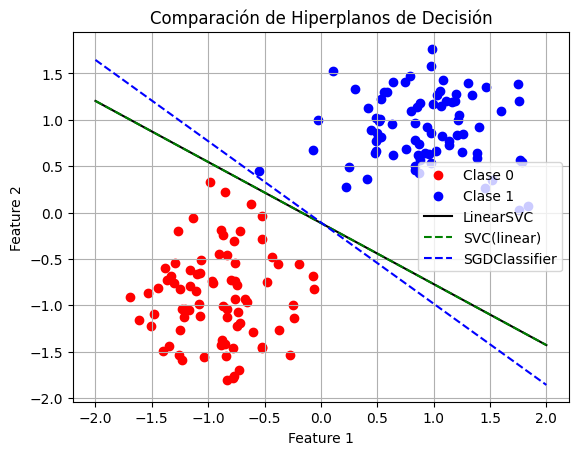

In [12]:
# Representar los 3 hiperplanos de decisión juntos
xx = np.linspace(-2, 2, 100)
yy1 = - (w[0] * xx + b) / w[1]
yy2 = - (w_2[0] * xx + b_2) / w_2[1]
yy3 = - (w_3[0] * xx + b_3) / w_3[1]
plt.scatter(X_train_scaled[y_train == 0][:, 0], X_train_scaled[y_train == 0][:, 1], color='red', label='Clase 0')
plt.scatter(X_train_scaled[y_train == 1][:, 0], X_train_scaled[y_train == 1][:, 1], color='blue', label='Clase 1')
plt.plot(xx, yy1, 'k-', label='LinearSVC')
plt.plot(xx, yy2, 'g--', label='SVC(linear)')
plt.plot(xx, yy3, 'b--', label='SGDClassifier')
plt.title('Comparación de Hiperplanos de Decisión')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.legend()
plt.show()

Todos los modelos deberían ser muy similares, ya que los datos son linealmente separables y los tres clasificadores están diseñados para manejar este tipo de problemas. Además, aunque los datos son aleatorios, no existe demasiado ruido, por lo que los modelos deberían converger a soluciones similares. Las principales diferencias pueden surgir en los coeficientes exactos debido a las diferencias en los algoritmos de optimización y regularización utilizados por cada clasificador.

Donde esto se hace más evidente es entre `LinearSVC` y `SVC(kernel="linear")`, que producen coeficientes casi idénticos. `SGDClassifier` muestra ligeras variaciones debido a su naturaleza estocástica, pero en general, todos están suficientemente alineados en términos de la frontera de decisión que crean.

### 10. Entrena un clasificador SVM en el conjunto de datos de vino, que se puede cargar utilizando `sklearn.datasets.load_wine()`. Este conjunto de datos contiene los análisis químicos de 178 muestras de vino producidas por 3 cultivadores diferentes: el objetivo es entrenar un modelo de clasificación capaz de predecir el cultivador a partir del análisis químico del vino. Dado que los clasificadores SVM son clasificadores binarios, será necesario utilizar la estrategia one-versus-all para clasificar las tres clases. ¿Qué exactitud puedes alcanzar?

En este caso se va a aplicar lo mismo del ejercicio anterior, pero usando un conjunto real de datos de vino. Se va a usar `LinearSVC` para entrenar un modelo de clasificación capaz de predecir el cultivador a partir del análisis químico del vino.

Tanto con `LinearSVC` como con `SVC(kernel="linear")` y `SGDClassifier` la estrategia one-versus-all se aplica automáticamente al tratarse de clasificadores multiclase.

#### Inicialización. Cargar datos y escalar

In [13]:
# Cargar el conjunto de datos de vino
from sklearn.datasets import load_wine

# Cargamos el dataset del vino
wine = load_wine()
X_wine = wine.data        # características químicas del vino
y_wine = wine.target      # cultivador (0, 1, 2)

print("Shape X:", X_wine.shape)
print("Clases:", set(y_wine))

Shape X: (178, 13)
Clases: {np.int64(0), np.int64(1), np.int64(2)}


In [14]:
# Diccionario con las características
import random

feature_dict = {name: idx for idx, name in enumerate(wine.feature_names)}
feature_dict

{'alcohol': 0,
 'malic_acid': 1,
 'ash': 2,
 'alcalinity_of_ash': 3,
 'magnesium': 4,
 'total_phenols': 5,
 'flavanoids': 6,
 'nonflavanoid_phenols': 7,
 'proanthocyanins': 8,
 'color_intensity': 9,
 'hue': 10,
 'od280/od315_of_diluted_wines': 11,
 'proline': 12}

In [15]:
# División train/test
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42, stratify=y_wine
)

# Escalado 
scaler_wine = StandardScaler()
X_wine_train_scaled = scaler_wine.fit_transform(X_wine_train)
X_wine_test_scaled = scaler_wine.transform(X_wine_test)

#### Entrenar el LinearSVC

In [16]:
# Entrenamiento del modelo LinearSVC con estrategia One-vs-All implícita
linear_svm_ova = LinearSVC(
    C=100.0, 
    loss="hinge", 
    random_state=42,
    max_iter=10000
    )
linear_svm_ova.fit(X_wine_train_scaled, y_wine_train)

train_acc_linear = linear_svm_ova.score(X_wine_train_scaled, y_wine_train)
test_acc_linear  = linear_svm_ova.score(X_wine_test_scaled, y_wine_test)

print("LinearSVC (OvA) - accuracy train:", train_acc_linear)
print("LinearSVC (OvA) - accuracy test :", test_acc_linear)

# Coeficientes y sesgos para cada clase
for i in range(len(linear_svm_ova.classes_)):
    w_class = linear_svm_ova.coef_[i]
    b_class = linear_svm_ova.intercept_[i]
    print(f"Clase {i} \n\tCoeficiente (w): {w_class} \n\tSesgo (b): {b_class}")

LinearSVC (OvA) - accuracy train: 1.0
LinearSVC (OvA) - accuracy test : 0.9722222222222222
Clase 0 
	Coeficiente (w): [ 0.67170655  0.36049289  0.58367652 -0.85294092  0.13834287  0.08741021
  0.7218891   0.07390456 -0.13171681  0.19180865 -0.1091874   0.55125963
  0.84637035] 
	Sesgo (b): -0.8047499377982943
Clase 1 
	Coeficiente (w): [-0.78603802 -0.6769466  -0.91995303  0.66579072  0.07203329 -0.05021917
  0.92536139  0.43930254  0.17660091 -2.16234856  0.18775724 -0.59114017
 -1.53793305] 
	Sesgo (b): -0.979360260391513
Clase 2 
	Coeficiente (w): [ 0.19397228  0.01596901  0.40464681  0.24826082 -0.2074512   0.04096568
 -1.11065631 -0.21028798 -0.47785828  0.92063973 -0.6127323  -0.15910871
  0.36259296] 
	Sesgo (b): -1.439779895582685


Con la estrategia One-vs-All se obtienen 3 clasificadores lineales independientes, uno por cada clase. Cada clasificador aprende a distinguir una clase frente a las demás. Por lo que se crean 3 hiperplanos de 13 dimensiones (una por cada característica) para cada clase y el valor de sesgo asociado.

En la siguiente celda, se utilizan el clasificador entrenado para determinar a que clase pertenece una muestra aleatoria, a modo de prueba.

In [17]:
# En la siguiente celda, se utilizan 2 de los clasificadores entrenados para determinar a que clase pertenece una muestra aleatoria.
random_idx = random.randint(0, X_wine_test_scaled.shape[0] - 1)
sample = X_wine_test_scaled[random_idx].reshape(1, -1)

#Clase real
print("Muestra aleatoria índice:", random_idx)
print("Clase real:", y_wine_test[random_idx])
print("Características escaladas de la muestra:", sample)

# Prediccion de la clase
predicted_class = linear_svm_ova.predict(sample)
print("Clase predicha por LinearSVC (OvA):", predicted_class[0])

Muestra aleatoria índice: 3
Clase real: 1
Características escaladas de la muestra: [[-1.76503247 -0.26426092  3.23497383  2.63426892  1.30107566  1.46346405
   3.26235249  0.92481219  0.46697929  0.43424051 -0.0840653   1.57708961
  -0.91360326]]
Clase predicha por LinearSVC (OvA): 1


Se podría intentar visualizar los datos en 2D, pero con 13 dimensiones es complicado. Una opción sería usar técnicas de reducción de dimensionalidad como PCA para proyectar los datos en 2D y luego visualizar las fronteras de decisión, pero esto puede no reflejar completamente la complejidad del modelo entrenado en el espacio original. 

Sí que se podrían entrenar modelos SVM característica por característica (usando solo 2 características a la vez) para visualizar las fronteras de decisión en 2D, pero esto no capturaría las interacciones entre todas las características presentes en el conjunto de datos original. Además, de por sí los datos parecen no ser linealmente separables en 2D para ciertos pares de características, por lo que las fronteras lineales serían bastante simples y no reflejarían el rendimiento del modelo entrenado en el espacio completo de 13 dimensiones.

Se puede usar la siguiente gráfica para comprobar esto mismo.

Características seleccionadas para visualización: ash vs. malic_acid


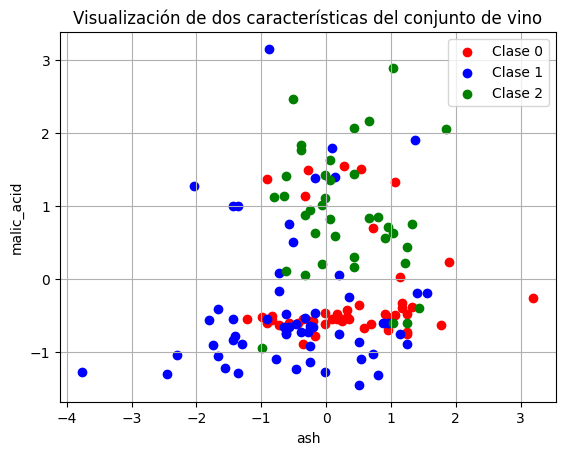

In [18]:
feature_names = list(feature_dict.keys())
feat1, feat2 = random.sample(feature_names, 2)  
idx1 = feature_dict[feat1]
idx2 = feature_dict[feat2]

print(f"Características seleccionadas para visualización: {feat1} vs. {feat2}")

plt.scatter(X_wine_train_scaled[y_wine_train == 0][:, idx1], X_wine_train_scaled[y_wine_train == 0][:, idx2], color='red', label='Clase 0')
plt.scatter(X_wine_train_scaled[y_wine_train == 1][:, idx1], X_wine_train_scaled[y_wine_train == 1][:, idx2], color='blue', label='Clase 1')
plt.scatter(X_wine_train_scaled[y_wine_train == 2][:, idx1], X_wine_train_scaled[y_wine_train == 2][:, idx2], color='green', label='Clase 2')
plt.title('Visualización de dos características del conjunto de vino')
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend()
plt.grid()
plt.show()

## Parte práctica (opcional):

### 11. Entrena y ajusta un regresor SVM en el conjunto de datos de viviendas de California. Puedes utilizar el conjunto de datos original en lugar de la versión modificada que usamos anteriormente, el cual se puede cargar usando `sklearn.datasets.fetch_california_housing()`. Los objetivos representan cientos de miles de dólares. Dado que hay más de 20,000 instancias, los SVM pueden ser lentos, por lo que, para el ajuste de hiperparámetros, deberías usar muchas menos instancias (por ejemplo, 2,000) para probar muchas más combinaciones de hiperparámetros. ¿Cuál es el RMSE de tu mejor modelo?

#### Inicialización. Cargar dataset

In [19]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data # características de la vivienda
y = housing.target  # valor (mediana) en cientos de miles de dólares

print(housing.DESCR) 


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [20]:
# División train/test
X_housing_train, X_housing_test, y_housing_train, y_housing_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42
)

In [21]:
# Escalado
scaler_housing = StandardScaler()
X_housing_train_scaled = scaler_housing.fit_transform(X_housing_train)
X_housing_test_scaled = scaler_housing.transform(X_housing_test)

In [22]:
# Subconjunto reducido para buscar hiperparámetros
n_sub = 2000
rng = np.random.default_rng(42)
sub_indices = rng.choice(X_housing_train_scaled.shape[0], size=n_sub, replace=False)

X_housing_sub = X_housing_train_scaled[sub_indices]
y_housing_sub = y_housing_train[sub_indices]

Como este problema es de Regresión y no de clasificación tenemos que usar `SVR` en vez de `SVC` (clasificación).

In [23]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Espacio de hiperparámetros para SVR
param_grid = {
    "C": np.logspace(-1, 3, 10),
    "gamma": np.logspace(-4, -1, 10),
    "epsilon": [0.01, 0.05, 0.1, 0.2]
}

# Búsqueda
rnd_search = RandomizedSearchCV(
    SVR(kernel="rbf"),
    param_distributions=param_grid,
    n_iter=30,
    scoring="neg_root_mean_squared_error",
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rnd_search.fit(X_housing_sub,y_housing_sub)

print("Mejores hiperparámetros:", rnd_search.best_params_)
print("Mejor neg-RMSE CV:", rnd_search.best_score_)

# Evaluación en test
best_model = rnd_search.best_estimator_
y_pred = best_model.predict(X_housing_test)
rmse_test = np.sqrt(mean_squared_error(y_housing_test, y_pred))

print("\nRMSE en test:", rmse_test)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Mejores hiperparámetros: {'gamma': np.float64(0.1), 'epsilon': 0.01, 'C': np.float64(16.68100537200059)}
Mejor neg-RMSE CV: -0.6053467221992178
Mejores hiperparámetros: {'gamma': np.float64(0.1), 'epsilon': 0.01, 'C': np.float64(16.68100537200059)}
Mejor neg-RMSE CV: -0.6053467221992178

RMSE en test: 1.4257966364886752

RMSE en test: 1.4257966364886752


Se ha entrenado un regresor SVM (SVR con kernel RBF, es decir, función de base radial, que mide la similitud entre puntos en el espacio de características) sobre el conjunto California Housing, utilizando un subconjunto de 2.000 instancias para realizar la búsqueda de hiperparámetros. La mejor configuración obtenida fue aproximadamente C ≈ 16.68, γ = 0.1 y ε = 0.01. Con estos valores, el modelo alcanzó un RMSE de validación cruzada cercano a 0.61, mientras que la evaluación directa sobre el conjunto de test dio un RMSE aproximado de **1.43**.

Dado que el objetivo está expresado en cientos de miles de dólares, estos valores implican errores típicos del orden de 60.000 $ en validación y unos 140.000 $ en test. La diferencia entre ambas cifras sugiere que el modelo ajustado sobre el subconjunto de 2.000 muestras no generaliza de forma óptima al resto del conjunto: el SVR es capaz de capturar parte de la estructura del problema, pero la combinación de alta variabilidad en los datos y el uso de un subconjunto relativamente pequeño para el tuning provoca una clara degradación de rendimiento al evaluar sobre datos no vistos.

En la práctica, estos resultados indican que el SVM con kernel RBF puede ser una opción razonable para este problema, pero que sería recomendable reentrenar el modelo final con todos los datos de entrenamiento usando los hiperparámetros seleccionados, e incluso valorar técnicas adicionales (mayor regularización, ajuste más fino de γ o modelos alternativos) si se necesita reducir el error por debajo de este rango de RMSE.